In [14]:
import pandas as pd 

df =pd.read_csv('data/Raw_data.csv')
df.head()
target=df['Hg_conc'].to_numpy().reshape(-1,1)# 设置因变量
data=df.drop('Hg_conc',axis=1,inplace=False).to_numpy()
data.shape

(753, 22)

自变量多元数据：
the shape of x (753, 22)
自变量数据类型： <class 'numpy.ndarray'> 数据形状： (753, 22)
因变量数据类型： <class 'numpy.ndarray'> 数据形状： (753, 1)
current device: cuda
数据集长度：527
dataloder 处理后，一个batch size的长度： 753
第0次epoch的train loss为：278.2331237792969
第0次epoch的train r2为：-0.7516197110333659
第0次epoch的test loss为：283.2201232910156
第0次epoch的test r2为：-0.35652323617078596
################################
第20次epoch的train loss为：159.23402404785156
第20次epoch的train r2为：-0.19605648677914098
第20次epoch的test loss为：244.1375274658203
第20次epoch的test r2为：-2.0142257007617848
################################
第40次epoch的train loss为：124.49520111083984
第40次epoch的train r2为：0.031199791791716704
第40次epoch的test loss为：249.8041534423828
第40次epoch的test r2为：-1.7394450978735672
################################
第60次epoch的train loss为：104.6041259765625
第60次epoch的train r2为：0.1758752302507062
第60次epoch的test loss为：255.84649658203125
第60次epoch的test r2为：-1.5383085195679675
################################
第80次epoch的train loss为：98.8066787719726

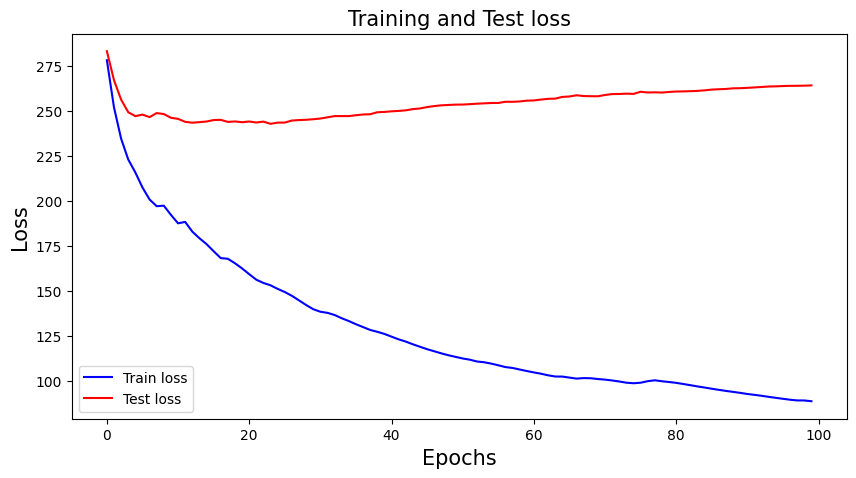

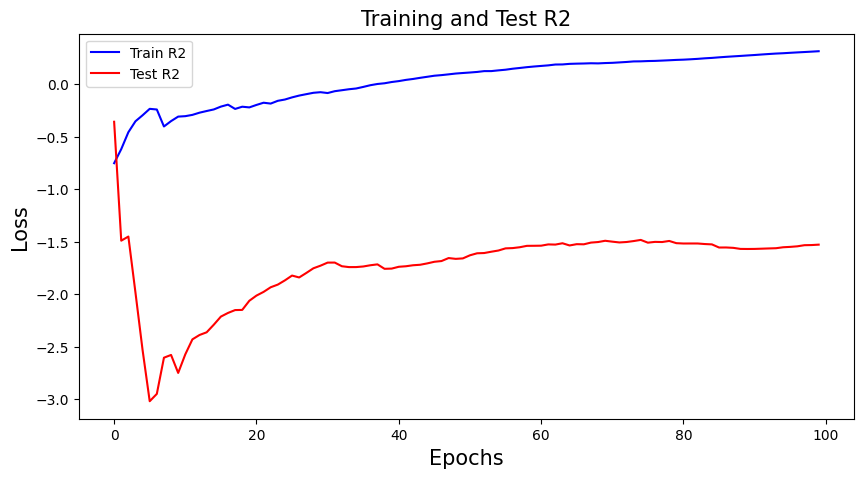

In [18]:
from torch.utils.data import Dataset, DataLoader
import torch 
import torch.nn as nn 
import torch.functional as F
from sklearn.model_selection import train_test_split as split
import numpy as np 
from sklearn.preprocessing import StandardScaler
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
 

def loss_fig(train_list,test_list,type='loss'):  
        fig = plt.gcf()
        fig.set_size_inches(10, 5)
        plt.xlabel('Epochs', fontsize=15)
        if type == 'loss':  
            label1='Train loss'
            label2='Test loss'
            title='Training and Test loss'
        elif type=='r2':
            label1='Train R2'
            label2='Test R2'
            title='Training and Test R2'

        plt.ylabel('Loss', fontsize=15)
        plt.plot(train_list, 'blue', label=label1)
        plt.plot(test_list, 'red', label=label2)
        plt.legend(loc='best')
        plt.title(title, fontsize=15)
        plt.show()
           





class MyNet2(nn.Module):
    def __init__(self,input,hidden,output,drop_p=0.5):
        super(MyNet2,self).__init__()
        self.net=nn.Sequential(
        nn.Linear(input,hidden),
        #nn.BatchNorm1d(hidden),
        nn.Dropout(p=drop_p),
        nn.ReLU(),
        nn.Linear(hidden,hidden),
        #nn.BatchNorm1d(hidden),
        nn.Dropout(p=drop_p),
        nn.ReLU(),
        nn.Linear(hidden,output),
        nn.Dropout(p=drop_p),
        nn.ReLU()
        )
   
    
    def forward(self,x):
        x=self.net(x)
 
        return x
    
class MyDataset(Dataset):
    def __init__(self,data,target,device='cuda') -> None:
        super().__init__()
        self.len=len(data)
        std=StandardScaler()
        data=std.fit_transform(data)
        self.data=torch.from_numpy(data).float().to(device)#注意数据类型转换
        self.target=torch.from_numpy(target).float().to(device)#注意数据类型转换
        
    def __len__(self) -> int:
        return self.len
    
    def __getitem__(self,index):
        return self.data[index],self.target[index]


        
if __name__ == '__main__':
    #try:
        #print(" 载入数据tpye",type(boston))
    #except NameError:
        #boston = load_boston()                                
        #print("载入数据tpye",type(boston))
    #boston=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data",header=None,sep='\s+')

    
    #boston.columns=('CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PROATIO','B','LSTAT','MEDV')
    df =pd.read_csv('data/Raw_data.csv')
    df.head()
    y=df['Hg_conc'].to_numpy().reshape(-1,1)# 设置因变量
    x=df.drop('Hg_conc',axis=1,inplace=False).to_numpy()
    #获取数据键
    #print(boston.keys())
    #print("数据集描述：",boston['DESCR'])
    print("自变量多元数据：")
    #print(boston['feature_names'])
    #print(boston['data'][0:1])''
    #print("因变量：")
    #print(boston['target'])
    ################################################################
    #因变量自变量提取#
    #x=boston['data'].values
    #x=boston.iloc[:,0:-1].values
    #x=boston['target'].values
    print("the shape of x",x.shape)
    print("自变量数据类型：",type(x),"数据形状：",x.shape)
     
    #y=boston['MEDV'].values.reshape(-1,1)
    print("因变量数据类型：",type(y),"数据形状：",y.shape)
    ################################################################
    #对变量进行标准化
    scaler=StandardScaler()
    x=scaler.fit_transform(x)
    #数据划分#
    x_train,x_test,y_train,y_test=split(x,y,test_size=0.3,random_state=6)
    #############################使用DataSet包装数据，DataLoader读取数据###################################
    ################################并载入本机gpu或cpu################################`
    device="cuda" if torch.cuda.is_available() else "cpu"
    print("current device: " + device)
    train_data=MyDataset(x_train,y_train,device=device)
    test_data=MyDataset(x_test,y_test)
 
    print("数据集长度：{}".format(train_data.len))
    train_data_loader=DataLoader(train_data,shuffle=True,batch_size=20)
    test_data_loader=DataLoader(test_data,shuffle=False,batch_size=20)
    #x,y=next(iter(train_data_loader))#iter调用train_data_loader de 调用__iter__()方法，该方法返回一个迭代器。然后，next()在该迭代器上调用__next__()方法以获得第一次迭代。再次运行next()将获得迭代器的第二项，依此类推。
    print("dataloder 处理后，一个batch size的长度：",len(x))
    ################################super parameters################################
    learning_rate=0.02
    epochs=100
    weight_decay=0.005
    ################################create modle,opt,loss_fn################################
    net=MyNet2(input=22,hidden=50,output=1)
    net.to(device)
    opt=torch.optim.Adam(params=net.parameters(),lr=learning_rate,weight_decay=weight_decay)
    loss_fn=nn.MSELoss()
    ################################create loss accury list###################################
    test_batch_loss=[]
    train_batch_loss=[]
    test_batch_r2=[]
    train_batch_r2=[]
    train_epoch_loss_list=[]
    test_epoch_loss_list=[]
    test_epoch_r2_list=[]
    train_epoch_r2_list=[]

    ################################训练模型，注意载入数据时候的dataloader 方法
    for epoch in range(epochs):
        for x_batch,y_batch in train_data_loader:# 每次读取一个batch，循环遍历一次epoch
  
            y_batch_pred=net(x_batch)
            loss=loss_fn(y_batch_pred,y_batch)
            r2=r2_score(y_batch.cpu().detach().numpy(),y_batch_pred.cpu().detach().numpy())#计算r2
            opt.zero_grad()
            loss.backward()
            opt.step()
            train_batch_loss.append(loss.cpu().detach().numpy())
            train_batch_r2.append(r2)
        train_epoch_loss=np.mean(train_batch_loss)
        train_epoch_loss_list.append(train_epoch_loss)

        train_epoch_r2=np.mean(train_batch_r2)
        train_epoch_r2_list.append(train_epoch_r2)
        
        
        net.eval()# 由于dropout存在在进行test的时候，需要关闭droput层以进行测试
        with torch.no_grad():
            for x_batch,y_batch in test_data_loader:# 每次读取一个batch，循环遍历一次epoch

                y_batch_pred=net(x_batch)
                loss=loss_fn(y_batch_pred,y_batch)
                
                r2= r2_score(y_batch.cpu().detach().numpy(),y_batch_pred.cpu().detach().numpy())
                test_batch_loss.append(loss.cpu().detach().numpy())    
                test_batch_r2.append(r2)   
            
            test_epoch_loss=np.mean(test_batch_loss)#每一个batch的平均loss
            test_epoch_r2=np.mean(test_batch_r2)#每一个batch的平均r2
            test_epoch_loss_list.append(test_epoch_loss)
            test_epoch_r2_list.append(test_epoch_r2)
            
            if epoch%20==0:
                print("第{}次epoch的train loss为：{}".format(epoch,train_epoch_loss))
                print("第{}次epoch的train r2为：{}".format( epoch,train_epoch_r2))
                print("第{}次epoch的test loss为：{}".format( epoch,test_epoch_loss))
                print("第{}次epoch的test r2为：{}".format( epoch,test_epoch_r2))
                print("################################")
    loss_fig(train_epoch_loss_list,test_epoch_loss_list)
    loss_fig(train_epoch_r2_list,test_epoch_r2_list,type='r2') 